# Regressions

The following dataset contains information on the sleep patterns of a group of students who are preparing for the fifth examination of the subject "Statistics and Probability".

The file can be found in our data folder. This database contains information related to sleep efficiency, age, gender, and other variables:

- <code>ID:</code> Unique identifier for the student.
- <code>Gender:</code> Student's gender (Female/Male).
- <code>Age:</code> Student's age.
- <code>Sleep duration:</code> The total sleep time of the student (in hours).
- <code>Sleep efficiency:</code> Measure of the proportion of time spent sleeping in bed.
- <code>REM sleep percentage:</code> The percentage of total sleep time dedicated to REM sleep.
- <code>Awakenings:</code> The number of times the student wakes up during the night.
- <code>Caffeine consumption:</code> The amount of caffeine consumed in the 24 hours before going to bed (in mg).
- <code>Alcohol consumption:</code> The amount of alcohol consumed in the 24 hours before going to bed (in ml).
- <code>Smoking status:</code> Whether the student smokes or not

In [1]:
import pandas as pd
import statsmodels.api as sm
import scipy.stats as stats

import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("data/data.csv")
df.head()

,ID,Age,Gender,Sleep.duration,Sleep.efficiency,REM.sleep.percentage,Awakenings,Caffeine.consumption,Alcohol.consumption,Smoking.status
0,1,65,Female,6.0,0.88,18,0.0,0.0,0.0,Yes
1,2,69,Male,7.0,0.66,19,3.0,0.0,3.0,Yes
2,3,40,Female,8.0,0.89,20,1.0,0.0,0.0,No
3,4,40,Female,6.0,0.51,23,3.0,50.0,5.0,Yes
4,5,57,Male,8.0,0.76,27,3.0,0.0,3.0,No


# Exercise 1

The company responsible for creating the sleeping bag that improves sleep efficiency and simultaneously reduces delirium symptoms during exam periods is conducting an analysis to determine which age group they should target in their advertising campaigns.

- **a) Create a scatter plot between the variable Sleep_efficiency and the variable Age. What is the correlation coefficient? Interpret the result.**

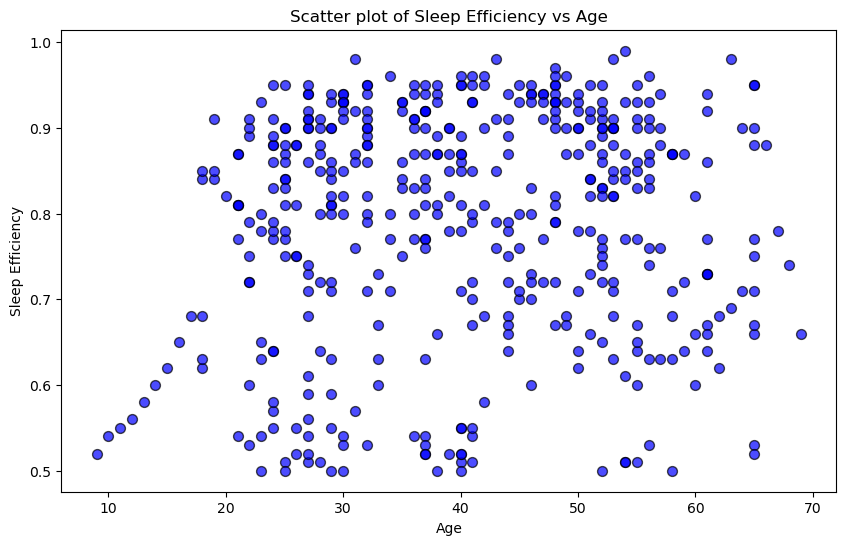

In [3]:
# Scatter plot

plt.figure(figsize=(10, 6))

plt.scatter(df['Age'], df['Sleep.efficiency'], color='blue', s=50, alpha=0.7, edgecolors='black')
plt.xlabel('Age')
plt.ylabel('Sleep Efficiency')
plt.title('Scatter plot of Sleep Efficiency vs Age')

plt.show()

To compute the correlation, we can use the corr() method from pandas:

In [4]:
# Correlation
correlation = df['Age'].corr(df['Sleep.efficiency'])

correlation

0.09835669021700891

The correlation coefficient is low, which implies a weak linear correlation between these two variables

- **b) Find the following two parameters of the linear regression model to be studied: the intercept (𝐵0) and the slope (𝐵1)**

In [5]:
# Define the variables for the linear regression model
X = df['Age']
y = df['Sleep.efficiency']

# Add an intercept to our model
X = sm.add_constant(X)

# Create a model
model = sm.OLS(y, X).fit()

# Print the summary statistics of the regression model
print(model.summary())

# Extracting the intercept (B0) and slope (B1)
B0 = model.params[0]
B1 = model.params[1]
print(f"Intercept (B0): {B0}")
print(f"Slope (B1): {B1}")

                            OLS Regression Results                            
Dep. Variable:       Sleep.efficiency   R-squared:                       0.010
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     4.396
Date:                Tue, 19 Sep 2023   Prob (F-statistic):             0.0366
Time:                        00:27:51   Log-Likelihood:                 265.67
No. Observations:                 452   AIC:                            -527.3
Df Residuals:                     450   BIC:                            -519.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7482      0.020     36.657      0.0

Intercept (B0): 0.7482353273129556

Slope (B1): 0.0010098100969050412

- **c) What proportion of the variation in sleep efficiency cannot be explained by age?**

We know from theory that the coefficient of determination measures the percentage of variation in the dependent variable, and it corresponds to:

In [6]:
r_squared = model.rsquared
print(r_squared)

0.009674038510444793


Thus, 1 - coefficient of determination = unexplained variation. In this case:

In [7]:
unexplained_variation = 1 - r_squared
print(unexplained_variation)

0.9903259614895552


Thus, \(1 - \text{coefficient of determination} = \text{unexplained variation}\). In this case: \(1 - 0.009674 = 0.990326\) (or 99.03%) represents the variation not explained by the model.

1−0.009674=0.990326 (or 99.03%) represents the variation not explained by the model.

# Exercise 2

For the creation of the next improved version of the sleeping bag, different groups have been selected and subjected to various tests: the alarm test, the test of showing vacation photos before bedtime, and the caffeine consumption test.
First, we'll analyze the data from the caffeine consumption test. We want to analyze if there are differences between the mean caffeine consumption (variable Caffeine.consumption) across the different created groups (stored in the variable caffeine_group, not available in the dataset). The output of the result is shown below:



![figure1](mathfigures/figure1.png)

- **a) How many groups and how many observations are there in the dataset?**

<br>

- We know that \( df1 = k \) (number of groups) - 1. Since \( df1 = 2 \), the number of groups (k) is equal to 3 (\( df+1 \)).
- Regarding the number of observations (N), we know that: \( df2 = N \) (number of observations) − \( k \) (number of groups). Therefore, \( N = 189 + 3 = 192 \).
  
Therefore, the number of groups is 3 and the number of observations is 192.




- **b) If the significance level \( \alpha = 0.05 \) is used, what critical value should be used to perform the variance analysis?**

In this section, we are been asked for the critical value. We know that \( df1 = 2 \) and that \( df2 = 189 \), and for a significance level \( \alpha = 0.05 \), we have:
\[ F(0.05;3–1;192–3) = 3.043722 \]


In Python:

In [8]:
alpha = 0.05
df1 = 2
df2 = 189

critical_value = stats.f.ppf(1 - alpha, df1, df2)
print("Critical Value:", critical_value)

Critical Value: 3.0437216938407836


- **c) State the hypothesis test and interpret the results based on the critical value (5% significance level)**


First, let's define the hypothesis test:

Null hypothesis (H0): There are no differences between the means of caffeine consumption among the different groups of the variable "Caffeine consumption"

Alternative hypothesis (Ha): Not all means are equal. In other words, at least one mean of caffeine consumption among the different groups is different.

Given that <code>F* > F(α, df1, df2)</code>, where α is the significance level, df1 is the numerator degrees of freedom (2), and df2 is the denominator degrees of freedom (189), i.e., 364.9 > 3.043722, we reject H0. Therefore, at least one of the means is different.

In conclusion, there is evidence to suggest that there are differences in caffeine consumption means among the different groups.

# Exercise 3

Maria Angustias is concerned about her sleep efficiency. A salesperson for the sleeping bag wants to estimate Maria Angustias' sleep efficiency (variable Sleep.efficiency) using a multiple linear regression model with the following variables:

- Age
- Awakenings
- Caffeine.consumption


a) Write the multiple linear regression equation to explain the variable Sleep.efficiency using the variables Age, Awakenings, and Caffeine.consumption. (1 point).

The multiple linear regression model can be represented as follows:

In this equation:
- B0 represents the intercept (constant).
- B1 represents the coefficient for the Age variable.
- B2 represents the coefficient for the Awakenings variable.
- B3 represents the coefficient for the Caffeine.consumption variable.

In [9]:
df = df.dropna()

X = df[['Age', 'Awakenings', 'Caffeine.consumption']]

X = sm.add_constant(X)

y = df['Sleep.efficiency']

model = sm.OLS(y, X).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       Sleep.efficiency   R-squared:                       0.330
Model:                            OLS   Adj. R-squared:                  0.325
Method:                 Least Squares   F-statistic:                     64.13
Date:                Tue, 19 Sep 2023   Prob (F-statistic):           9.98e-34
Time:                        00:27:51   Log-Likelihood:                 307.63
No. Observations:                 394   AIC:                            -607.3
Df Residuals:                     390   BIC:                            -591.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.8225      0.021     39.405      0.000       0.781       0.864
Age                      0.0013      0.000      3.067      0.002       0.000       0.002
Awakenings              -0.0554      0.004    -13.322      0.000      -0.064      -0.047
Caffeine.consumption     0.0002      0.000      0.807      0.420      -0.000       0.001
==============================================================================
Omnibus:                       42.881   Durbin-Watson:                   2.086
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               54.736
Skew:                          -0.911   Prob(JB):                     1.30e-12
Kurtosis:                       3.132   Cond. No.                         188.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- **b) Analyze the estimated model as a whole (significance at a 5% level and coefficient of determination)**

To determine if the multiple linear regression model significantly explains the variable Sleep.efficiency, we need to perform the following hypothesis test:

- Null Hypothesis: 𝛽1 = 𝛽2 = 𝛽3 = 0

- Alternative Hypothesis: 𝛽𝑖 ≠ 0 (At least one of the coefficients is statistically different from 0).


The F-test statistic is 67.59 with a p-value < 2.2e-16. Since the p-value is less than 0.05, we can reject the null hypothesis, concluding that the model is globally significant.

To assess the goodness of fit, we examine the coefficient of determination, R-squared. In this case, the R-squared value is 0.3341661. This indicates that approximately 33.42% of the variance in the response variable (Sleep.efficiency) is explained by the model. Therefore, it is a model with relatively low explanatory power, even though it is significant.

- **c) Estimate the sleep efficiency (variable Sleep.efficiency) of a person who is 37 years old (variable Age), wakes up 5 times (variable Awakenings), and consumes 50mg of caffeine (variable Caffeine.consumption)**

The estimated sleep efficiency for this person would be approximately 0.601 (60.1%). This can be calculated from the regression calculation:

In [10]:
predict = 0.8279512 + 0.0011967 * 37 - 0.0558381 * 5 + 0.0001612 * 50
predict

0.6010985999999999

- **d) If you had to remove one variable from the model in part a), considering a significance level of 5%, which one would you remove and why?**

The variable Caffeine.consumption would be removed because its associated p-value is greater than 0.05, indicating that it is not statistically significant with the dependent variable.